# 1. Importing packages

In [45]:
from qiskit import *
%matplotlib inline

# 2. Building the circuit

## 2.1 State preperation(setting our source qubit to |1>)

Our Target is to get the same stae on the target qubit which in our case would be q2

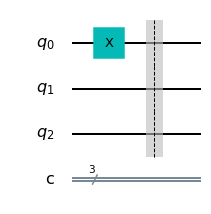

In [60]:
qc=QuantumCircuit(3,3)
'''
s=int(input())
if(s==1):
    qc.x(0)
elif(s==2):
    qc.h(0)
'''
qc.x(0)
qc.barrier()
qc.draw('mpl')


## 2.2 QT circuit

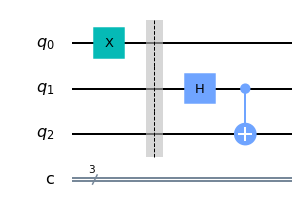

In [61]:
qc.h(1)
qc.cx(1,2)
qc.draw('mpl')

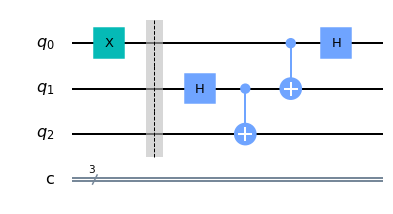

In [62]:
qc.cx(0,1)
qc.h(0)
qc.draw('mpl')

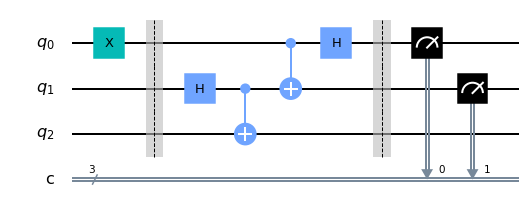

In [63]:
qc.barrier()
qc.measure([0,1],[0,1])
qc.draw('mpl')

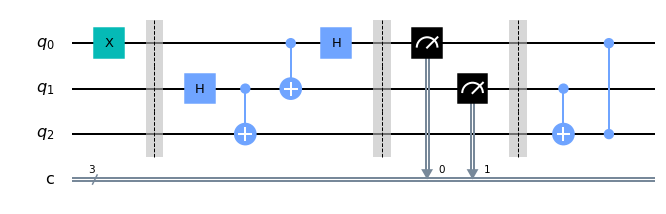

In [64]:
qc.barrier()
qc.cx(1,2)
qc.cz(0,2)
qc.draw('mpl')

In [65]:
qc.measure(2,2)

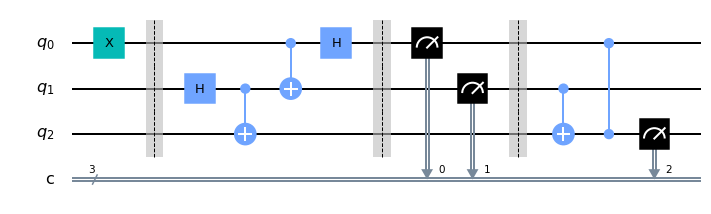

In [66]:
qc.draw('mpl')

## 3. Creating job to execute the circuit

In [67]:
backend=Aer.get_backend('qasm_simulator')
result= execute(qc,backend=backend,shots=1024).result()
counts=result.get_counts()

## 4. Visualization of result

In [68]:
from qiskit.tools.visualization import plot_histogram

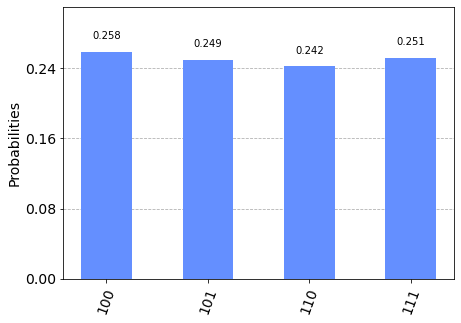

In [69]:
plot_histogram(counts)

In the above result we noticee that the first bit i.e. c2(according to qiskit last bit is the most significant bit) is always one which means it is equal to the state which we had prepared in the section one as our source. And therefore the teleportation of the bit has happend. 

## 5. Running the Circuit on real QC

In [40]:
from qiskit.tools.monitor import job_monitor

In [43]:
IBMQ.load_account()
provider=IBMQ.get_provider('ibm-q')
rbackend=provider.get_backend('ibmq_5_yorktown') #It was the free during making this also check if the qubit map 
rjob=execute(qc,backend=rbackend)
job_monitor(rjob)

ibmqfactory.load_account:WARNING:2020-08-27 17:49:26,049: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job incurred error     


In [44]:
rjob.error_message()

'Qubit measurement not the final instruction.. Error code: 7006.'

The above encountered error is due to the fact that we apply quantum gates even after we've measured the qubits. In theory it doesn't matter if the gates are controlled by quantum or classical qubits but this is yet to be the case for hardware.